In [4]:
# Importing the Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import re
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
nltk.download('stopwords') 

stop_words = set(stopwords.words('english'))
punctuation = punctuation + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import scipy.sparse as sp
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer 
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import contractions 
import pyrsm as rsm

In [5]:
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import os
os. getcwd()


'/mnt/c/Users/Yi/Dropbox/My PC (DESKTOP-ADBG3FN)/Desktop'

In [6]:
#drug_train = pd.read_csv("/mnt/c/Users/ky/Desktop/UCSD/drugsComTrain_raw.csv",encoding = 'latin-1')
#drug_test = pd.read_csv("/mnt/c/Users/ky/Desktop/UCSD/drugsComTest_raw.csv",encoding = 'latin-1')
drug_train = pd.read_csv("/mnt/c/Users/Yi/Dropbox/My PC (DESKTOP-ADBG3FN)/Desktop/drugsComTrain_raw.csv/drugsComTrain_raw.csv",encoding = 'latin-1')
drug_test = pd.read_csv("/mnt/c/Users/Yi/Dropbox/My PC (DESKTOP-ADBG3FN)/Desktop/drugsComTest_raw.csv/drugsComTest_raw.csv",encoding = 'latin-1')

In [7]:
print ("The shape of the train set given is : ", drug_train.shape)

The shape of the train set given is :  (161297, 7)


In [8]:
webmd = pd.read_csv("/mnt/c/Users/Yi/Dropbox/My PC (DESKTOP-ADBG3FN)/Desktop/webmd.csv",encoding = 'latin-1')

In [9]:
webmd

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [102]:
webmd['Condition'].value_counts()

Other                                                        49765
Pain                                                         25232
High Blood Pressure                                          23275
Depression                                                   14509
Birth Control                                                12253
                                                             ...  
Cystic Fibrosis                                                  1
Infection due to the Candida Fungus                              1
primary progressive multiple sclerosis                           1
Pneumonia Acquired from Being Treated In a Hospital              1
Complicated Abdominal Cavity Lining Clostridium Infection        1
Name: Condition, Length: 1806, dtype: int64

In [103]:
fulldrug['condition'].value_counts()

Birth Control                                  38436
Depression                                     12164
Pain                                            8245
Anxiety                                         7812
Acne                                            7435
                                               ...  
Yellow Fever Prophylaxis                           1
Klinefelter Syndrome                               1
Hydrocephalus                                      1
61</span> users found this comment helpful.        1
Hemorrhoids (pramoxine / zinc oxide)               1
Name: condition, Length: 916, dtype: int64

In this project we will use 3 methods:
    
    1. Rule-based methods:

    TextBlob: Simple rule-based API for sentiment analysis
    VADER: Parsimonious rule-based model for sentiment analysis of social media text.

    2.Feature-based methods:

    Bag of words(coLogistic Regression: Generalized linear model in Scikit-learn.

    3.Embedding-based methods: 
    Word2Vec

In [10]:
from platform import python_version

print(python_version())

3.8.5


# 1. Exploration Data Analysis

In [8]:
drug_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


These are additional explanations for variables.

- drugName (categorical): name of drug
- condition (categorical): name of condition
- review (text): patient review
- rating (numerical): 10 star patient rating
- date (date): date of review entry
- usefulCount (numerical): number of users who found review useful

The structure of the data is that a patient with a unique ID purchases a drug that meets his condition and writes a review and rating for the drug he/she purchased on the date. Afterwards, if the others read that review and find it helpful, they will click usefulCount, which will add 1 for the variable.

In [9]:
# Data types
drug_train.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

#### we will merge the train and test to preprocess


In [11]:
merge = [drug_train, drug_test]
fulldrug = pd.concat(merge)

print (fulldrug.shape)

fulldrug.head(10)

(215063, 7)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [109]:
fulldrug.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [110]:
# Null values
print ("Null values in the dataset : ", fulldrug.isnull().sum(axis = 0))

Null values in the dataset :  uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64


- since the number is small, around 5%, we will drop the NA 

##### lowercasing the column names so it will be easier for access 

In [12]:
fulldrug.columns = fulldrug.columns.str.lower()

In [13]:
# Sorting the dataframe
fulldrug.sort_values(['uniqueid'], ascending = True, inplace = True)
fulldrug.reset_index(drop = True, inplace = True)
fulldrug.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [12]:
# Total unique conditions in the dataset
print ("total condition: ",fulldrug['condition'].nunique(), "\n")
print ("total drug: ", fulldrug['drugname'].nunique(), "\n")

total condition:  916 

total drug:  3671 



#### see the distribution of drug rating 

In [16]:
fulldrug.rating.value_counts().sort_values(ascending = False)

10    68005
9     36708
1     28918
8     25046
7     12547
5     10723
2      9265
3      8718
6      8462
4      6671
Name: rating, dtype: int64

In [17]:
# top 10 drugs with rating equals 1
fulldrug.loc[fulldrug['rating'] == 1, :]['drugname'].value_counts().head(10)

Miconazole                            768
Ethinyl estradiol / norethindrone     747
Etonogestrel                          713
Levonorgestrel                        515
Nexplanon                             504
Ethinyl estradiol / norgestimate      478
Medroxyprogesterone                   450
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    399
Name: drugname, dtype: int64

In [18]:
# top 10 drugs with rating equals 10

fulldrug.loc[fulldrug['rating'] == 10, :]['drugname'].value_counts().head(10)

Levonorgestrel                       1892
Phentermine                          1085
Etonogestrel                          870
Varenicline                           666
Ethinyl estradiol / norethindrone     618
Escitalopram                          597
Clonazepam                            590
Alprazolam                            569
Sertraline                            553
Plan B                                527
Name: drugname, dtype: int64

In [19]:
# Number of users who found review useful = 0

fulldrug.loc[fulldrug.usefulcount == 0, 'drugname'].value_counts()


Etonogestrel                         598
Levonorgestrel                       480
Ethinyl estradiol / norethindrone    405
Implanon                             327
Ethinyl estradiol / norgestimate     278
                                    ... 
Tazarotene                             1
Efudex                                 1
Ortho D                                1
Olysio                                 1
Tinzaparin                             1
Name: drugname, Length: 1491, dtype: int64

In [14]:
# Converting the date in to date time format 

fulldrug['date'] = pd.to_datetime(fulldrug['date'])

## Exploratory Data Analysis


Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

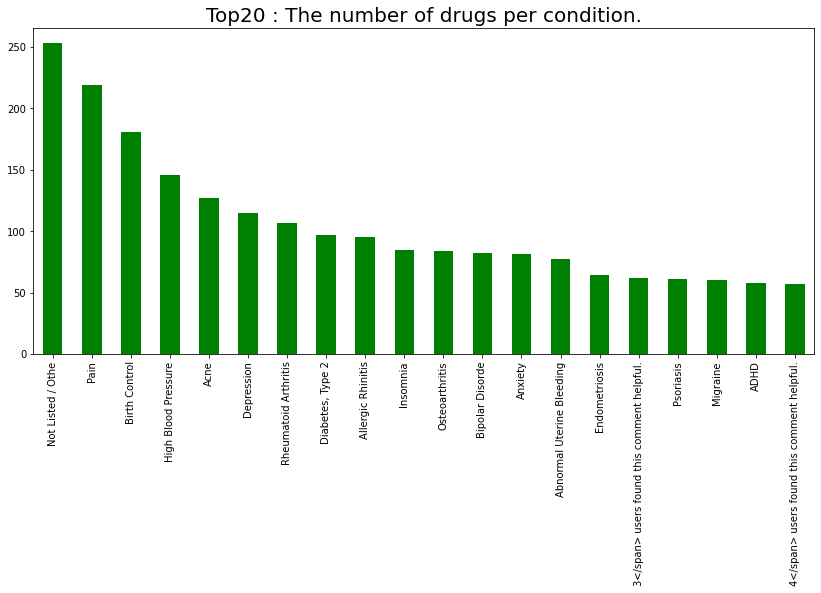

In [21]:
# drugname and condition are closely related 
condition_dn = fulldrug.groupby(['condition'])['drugname'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [22]:
fulldrug[fulldrug['condition']=='3</span> users found this comment helpful.'].head()


,uniqueid,drugname,condition,review,rating,date,usefulcount
3707,4010,Seroquel XR,3</span> users found this comment helpful.,"""I was on Seroquel XR 350 mg for 3 years to tr...",9,2015-08-11,3
5944,6424,Ocella,3</span> users found this comment helpful.,"""I have been taking Ocella for 7 months now. A...",6,2011-08-08,3
5952,6432,Ocella,3</span> users found this comment helpful.,"""I&#039;m 17 and have been on Ocella for about...",7,2010-10-20,3
5992,6475,Ocella,3</span> users found this comment helpful.,"""I&#039;m not going to say this is a bad produ...",3,2012-11-15,3
6310,6813,Beyaz,3</span> users found this comment helpful.,"""Beyaz worked as far as making my menstrual cy...",3,2011-07-03,3


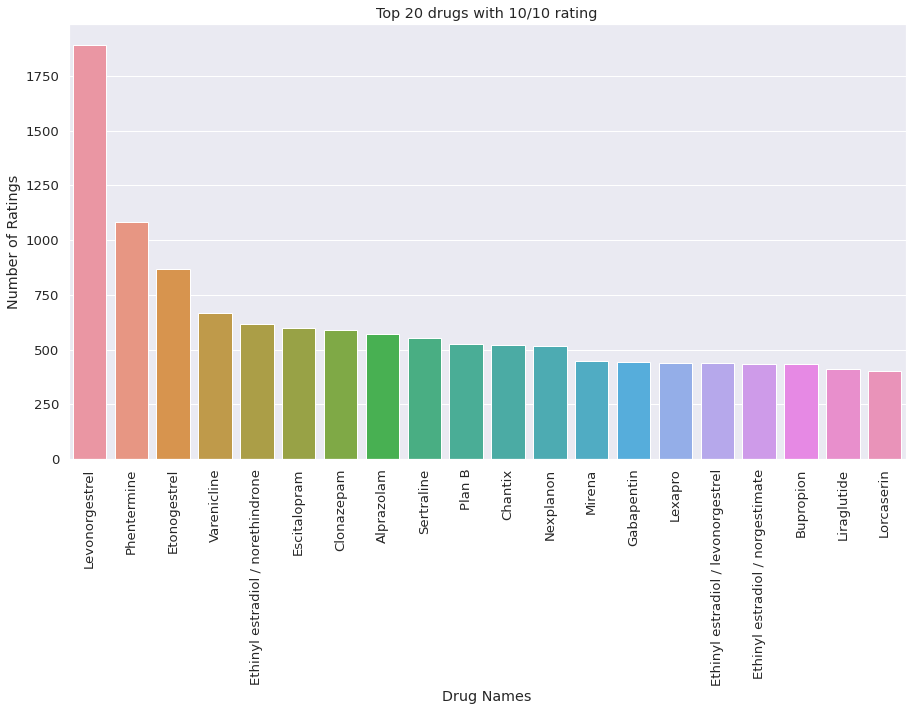

In [23]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(fulldrug.loc[fulldrug.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set(title = 'Top 20 drugs with 10/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

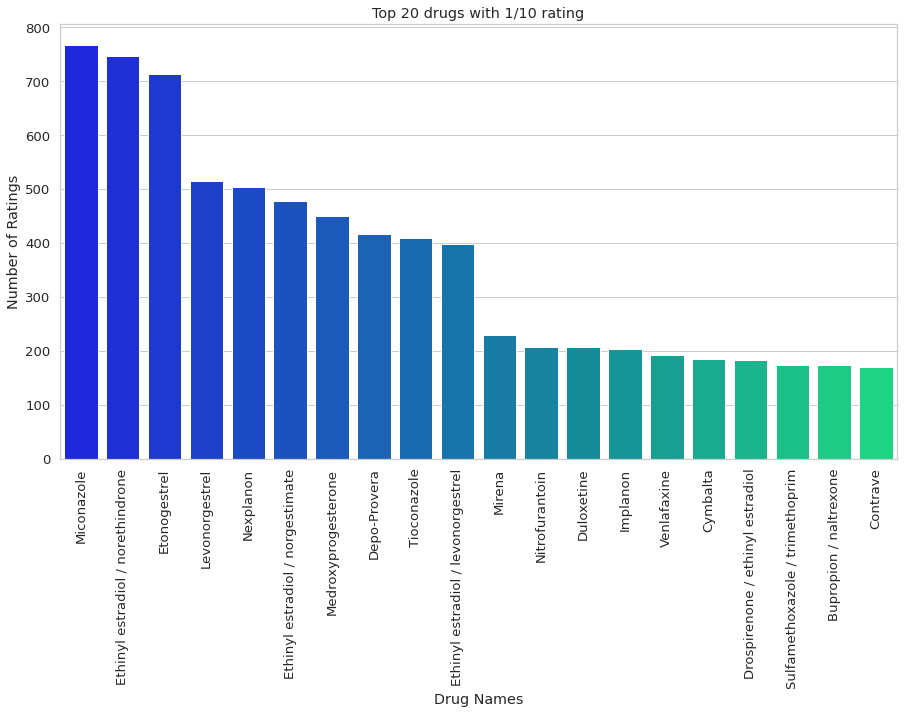

In [24]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(fulldrug.loc[fulldrug.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set(title = 'Top 20 drugs with 1/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")

plt.setp(sns_rating.get_xticklabels(), rotation=90);

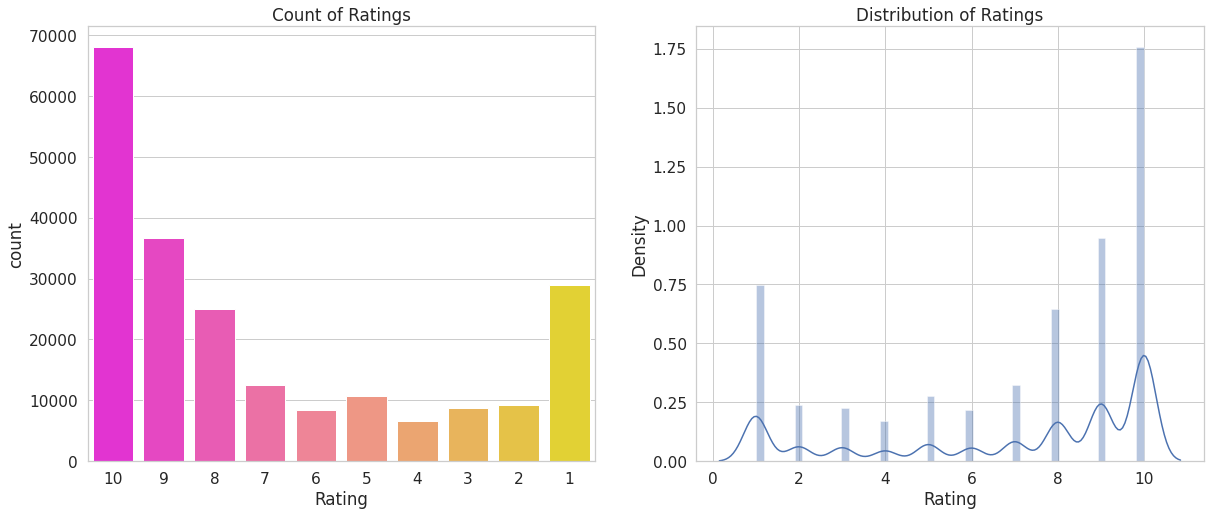

In [25]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(fulldrug['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(fulldrug['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating");

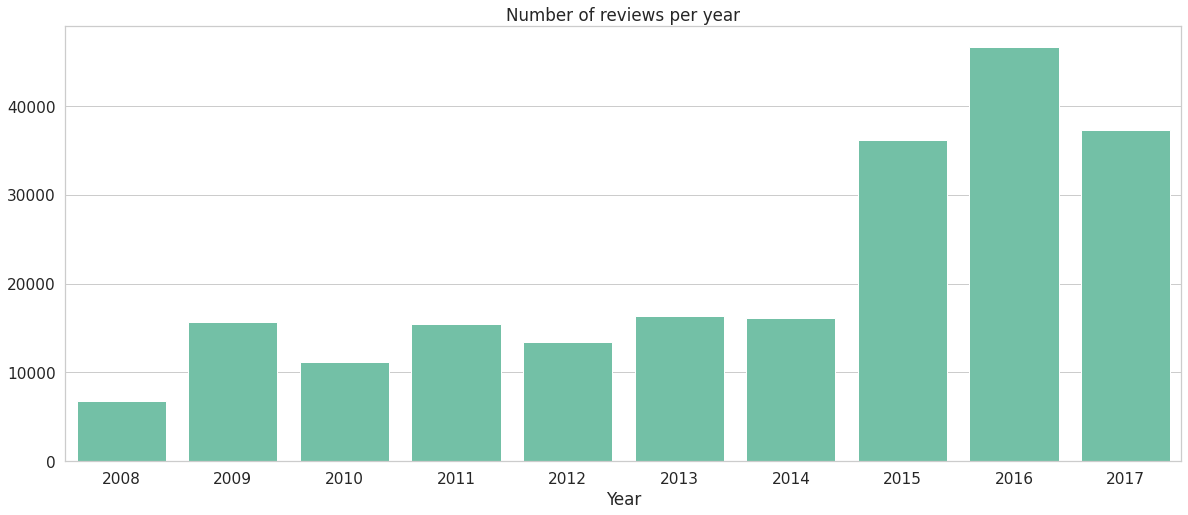

In [26]:
# This barplot shows the number of reviews per year
df = fulldrug['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("number of reviews per year")
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

- we can see that the review started growing a lots since 2015

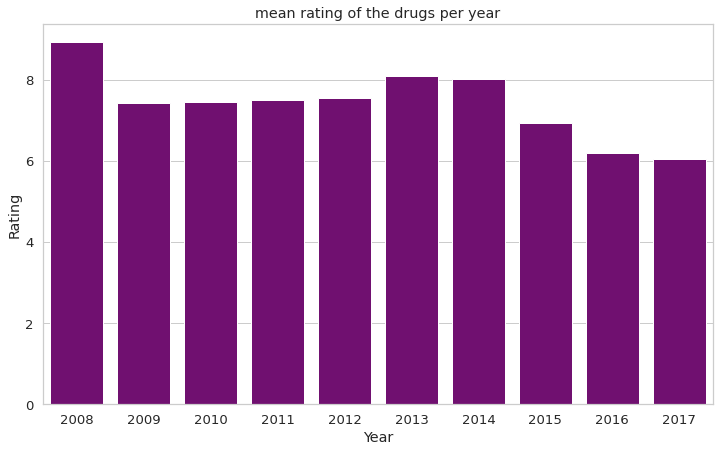

In [27]:
# This barplot shows the mean rating of the drugs per year

mean_rating = dict(fulldrug.groupby(fulldrug['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'purple');
sns_.set_title("mean rating of the drugs per year")
sns_.set_xlabel("Year")
sns_.set_ylabel("Rating");

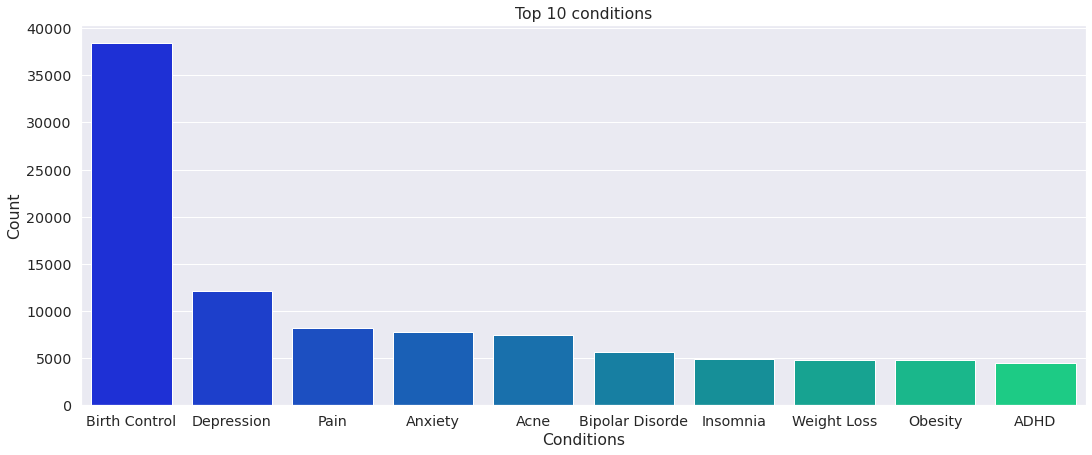

In [28]:
# This barplot show the top 10 conditions the people are suffering.

cond = dict(fulldrug['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

Text(0.5, 1.0, 'Distribution of usefulCount')

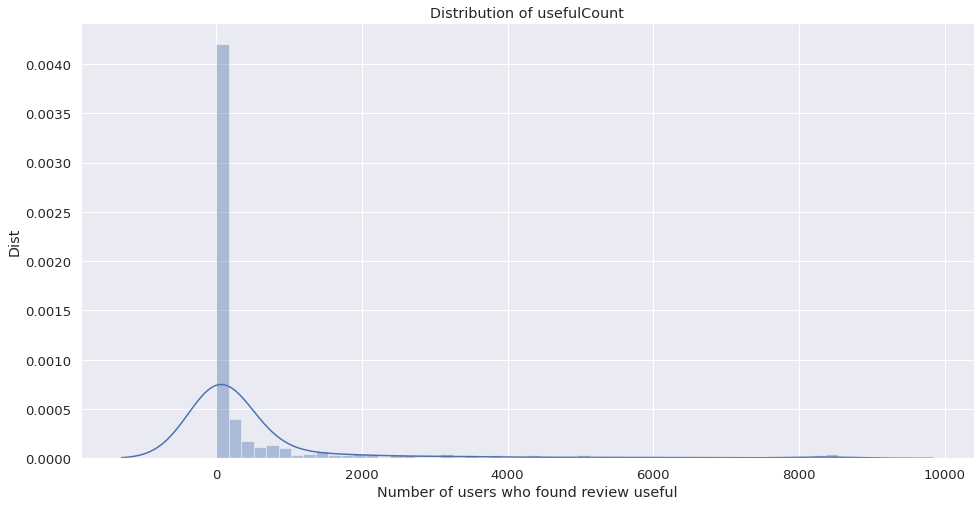

In [30]:
# Distribution of usefulcount

plt.figure(figsize=(16,8))

sns.distplot(fulldrug['usefulcount'].value_counts())


plt.xlabel('Number of users who found review useful')
plt.ylabel('Dist')
plt.title("Distribution of usefulCount")


## compare ngram to see which one is the best

In [15]:
import operator
from nltk import ngrams
from bs4 import BeautifulSoup

In [16]:
fulldrug['review_clean'] = [BeautifulSoup(text, 'html.parser').get_text() for text in fulldrug['review']]# delete the html
fulldrug['review_clean'] = fulldrug['review_clean'].str.replace('[^a-zA-Z]', ' ')
fulldrug['review_clean'] = fulldrug['review_clean'].str.replace("&#039;", "")
fulldrug['review_clean'] = fulldrug['review_clean'].str.replace(r'[^\w\d\s]',' ')
fulldrug['review_clean'] = fulldrug['review_clean'].str.replace(r'[^\x00-\x7F]+',' ')
fulldrug['review_clean'] = fulldrug['review_clean'].apply(contractions.fix) # fix the contraction 

In [16]:
fulldrug['review_clean']

0          Been on the depo injection since January     ...
1          I m    years old and recently found out I mig...
2          I have been on the shot    years and until a ...
3          I have had four shots at this point  I was on...
4          I had a total of   shots  I got my first one ...
                                ...                        
215058     Don t ever use this    When I was   years old...
215059     For acute maxillary sinusitis  Day two  just ...
215060     I took Amox Clav  x day for   days for my uri...
215061     Day     serious pain and diminished hearing i...
215062     Every time I have had a sinus infection and b...
Name: review_clean, Length: 215063, dtype: object

In [35]:
fulldrug['review']

0         "Been on the depo injection since January 2015...
1         "I&#039;m 21 years old and recently found out ...
2         "I have been on the shot 11 years and until a ...
3         "Ive had four shots at this point. I was on bi...
4         "I had a total of 3 shots. I got my first one ...
                                ...                        
215058    "Don&#039;t ever use this, \r\nWhen I was 4 ye...
215059    "For acute maxillary sinusitis. Day two, just ...
215060    "I took Amox Clav 2x day for 7 days for my uri...
215061    "Day 1 - serious pain and diminished hearing i...
215062    "Every time I have had a sinus infection and b...
Name: review, Length: 215063, dtype: object

In [36]:
def prepare_ngrams(corpus, n):   #returns a counting dictionary 
    # collect C(w_{i-n+1}, .. w_i)
    # collect C(w_{i-n+1}, .. w_{i-1})
    counter = dict() 
    for sentence in corpus:
        counter[''] = counter.get('', 0) + 1
        tokens = sentence.split()
        tokens = ['<s>'] + tokens + ['</s>']
        # TODO: replace UNKNOWN tokens by <unk>
        for i, token in enumerate(tokens):   #get a sliding window 
            combination = []  #will be the previous token 
            for j in range(i, max(0, i - n + 1) - 1, -1): #range the right hand side 
                combination.append(tokens[j])
                key = ' '.join(combination)
                counter[key] = counter.get(key, 0) + 1
    return dict(sorted(counter.items(), key=operator.itemgetter(1),reverse=True))

counter1_low = prepare_ngrams(fulldrug.loc[fulldrug.rating <= 4,'review_clean'], 1)
counter1_neu = prepare_ngrams(fulldrug.loc[(fulldrug.rating > 4) & (fulldrug.rating <= 6),'review_clean'], 1)
counter1_hig = prepare_ngrams(fulldrug.loc[fulldrug.rating >= 7,'review_clean'], 1)

In [37]:
counter2_low = ngrams(nltk.word_tokenize("".join(fulldrug.loc[fulldrug.rating <= 4,'review_clean'])), 2)
counter2_neu = ngrams(nltk.word_tokenize("".join(fulldrug.loc[(fulldrug.rating > 4) & (fulldrug.rating <= 6),'review_clean'])), 2)
counter2_hig = ngrams(nltk.word_tokenize("".join(fulldrug.loc[fulldrug.rating >= 7,'review_clean'])), 2)

counter3_low = ngrams(nltk.word_tokenize("".join(fulldrug.loc[fulldrug.rating <= 4,'review_clean'])), 3)
counter3_neu = ngrams(nltk.word_tokenize("".join(fulldrug.loc[(fulldrug.rating > 4) & (fulldrug.rating <= 6),'review_clean'])), 3)
counter3_hig = ngrams(nltk.word_tokenize("".join(fulldrug.loc[fulldrug.rating >= 7,'review_clean'])), 3)

In [38]:
frequency_low = Counter(counter1_low)
frequency_med = Counter(counter1_neu)
frequency_hig = Counter(counter1_hig)

df_low = pd.DataFrame(frequency_low.most_common(20))
df_med = pd.DataFrame(frequency_med.most_common(20))
df_hig = pd.DataFrame(frequency_hig.most_common(20))

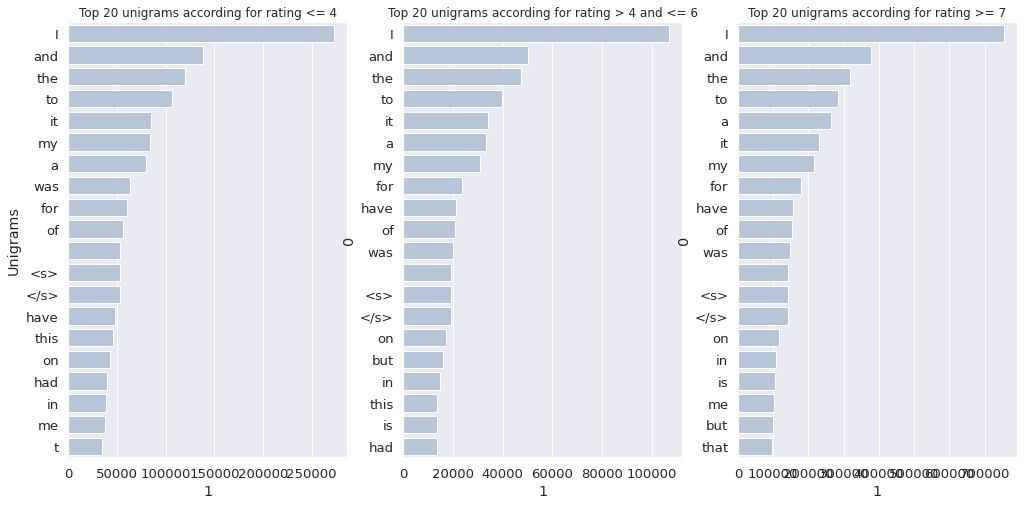

In [39]:
# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [17,8]
fig, ax = plt.subplots(1,3)
sns.set(font_scale = 1, style = 'whitegrid')

sns_low = sns.barplot(x = df_low[1], y = df_low[0], color = 'lightsteelblue', ax = ax[0])
sns_med = sns.barplot(x = df_med[1], y = df_med[0], color = 'lightsteelblue', ax = ax[1])
sns_hig = sns.barplot(x = df_hig[1], y = df_hig[0], color = 'lightsteelblue', ax = ax[2])

# Setting axes labels
sns_low.set_title("Top 20 unigrams according for rating <= 4")
sns_med.set_title("Top 20 unigrams according for rating > 4 and <= 6")
sns_hig.set_title("Top 20 unigrams according for rating >= 7")
sns_low.set_ylabel("Unigrams");

In [40]:
frequency_low_bi = Counter(counter2_low)
frequency_med_bi = Counter(counter2_neu)
frequency_hig_bi = Counter(counter2_hig)

df_low_bi = pd.DataFrame(frequency_low_bi.most_common(20))
df_med_bi = pd.DataFrame(frequency_med_bi.most_common(20))
df_hig_bi = pd.DataFrame(frequency_hig_bi.most_common(20))

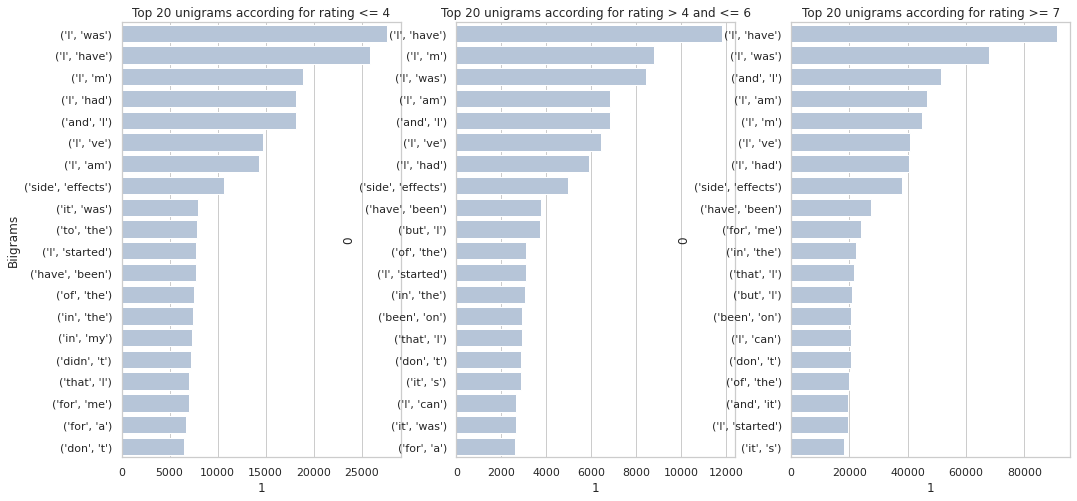

In [41]:
# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [17,8]
fig, ax = plt.subplots(1,3)
sns.set(font_scale = 1, style = 'whitegrid')

sns_low = sns.barplot(x = df_low_bi[1], y = df_low_bi[0], color = 'lightsteelblue', ax = ax[0])
sns_med = sns.barplot(x = df_med_bi[1], y = df_med_bi[0], color = 'lightsteelblue', ax = ax[1])
sns_hig = sns.barplot(x = df_hig_bi[1], y = df_hig_bi[0], color = 'lightsteelblue', ax = ax[2])

# Setting axes labels
sns_low.set_title("Top 20 unigrams according for rating <= 4")
sns_med.set_title("Top 20 unigrams according for rating > 4 and <= 6")
sns_hig.set_title("Top 20 unigrams according for rating >= 7")
sns_low.set_ylabel("Biigrams");

In [42]:
frequency_low_tri = Counter(counter3_low)
frequency_med_tri = Counter(counter3_neu)
frequency_hig_tri = Counter(counter3_hig)

df_low_tri = pd.DataFrame(frequency_low_tri.most_common(20))
df_med_tri = pd.DataFrame(frequency_med_tri.most_common(20))
df_hig_tri = pd.DataFrame(frequency_hig_tri.most_common(20))

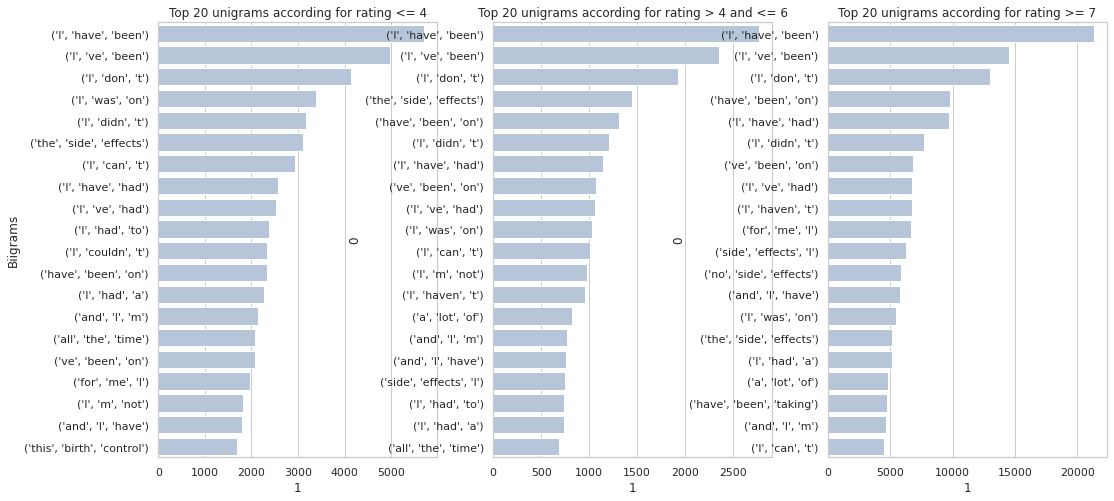

In [43]:
# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [17,8]
fig, ax = plt.subplots(1,3)
sns.set(font_scale = 1, style = 'whitegrid')

sns_low = sns.barplot(x = df_low_tri[1], y = df_low_tri[0], color = 'lightsteelblue', ax = ax[0])
sns_med = sns.barplot(x = df_med_tri[1], y = df_med_tri[0], color = 'lightsteelblue', ax = ax[1])
sns_hig = sns.barplot(x = df_hig_tri[1], y = df_hig_tri[0], color = 'lightsteelblue', ax = ax[2])

# Setting axes labels
sns_low.set_title("Top 20 Triigrams according for rating <= 4")
sns_med.set_title("Top 20 Triigrams according for rating > 4 and <= 6")
sns_hig.set_title("Top 20 Triigrams according for rating >= 7")
sns_low.set_ylabel("Triigrams");

### count the frequency of each words excluding the stopwords

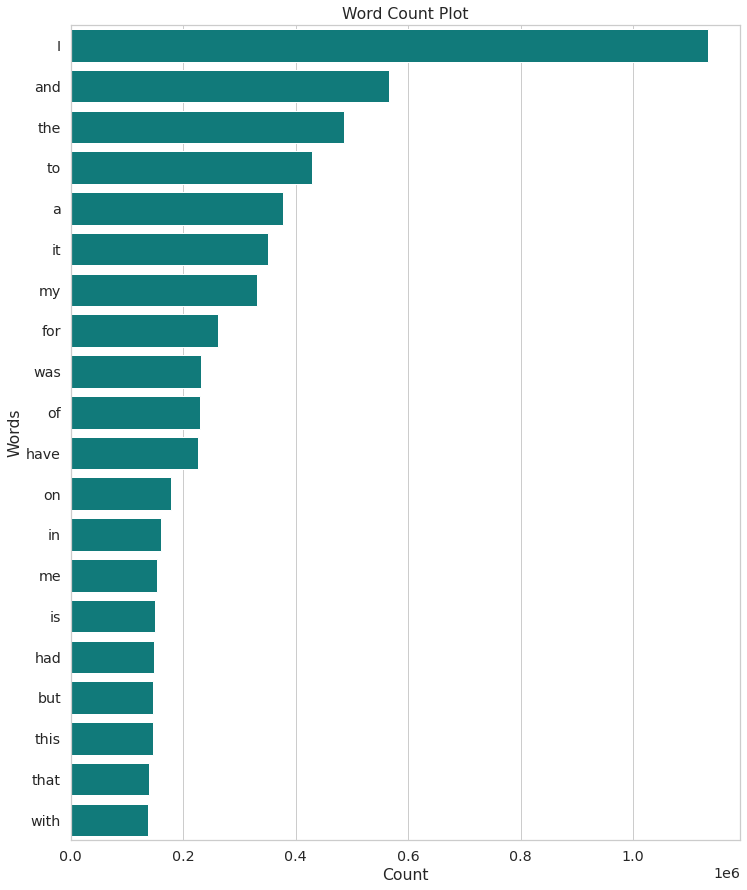

In [44]:

df_review = " ".join(fulldrug['review_clean'])
tokenize = word_tokenize(df_review)
frequency = Counter(tokenize)
df = pd.DataFrame(frequency.most_common(20))

plt.rcParams['figure.figsize'] = [12, 15]
sns.set(font_scale = 1.3, style = 'whitegrid')

# plotting
word_count = sns.barplot(x = df[1], y = df[0], color = 'darkcyan')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count");

# 2. Data Preprocessing

## preprocess metadata and sentiment

- giving sentiment according to ratings
- delete conditions with only a few drug(rare)
- delete conditions that has </span users found this comment helpful' message in it

In [116]:
# Null values
print ("Null values in the dataset : ", fulldrug.isnull().sum(axis = 0))

Null values in the dataset :  uniqueid           0
drugname           0
condition       1194
review             0
rating             0
date               0
usefulcount        0
review_clean       0
dtype: int64


In [19]:
# We drop all the missing values NA
fulldrug = fulldrug.dropna(axis=0)

In [20]:
df_condition = fulldrug.groupby(['condition'])['drugname'].nunique().sort_values()
df_condition = pd.DataFrame(df_condition).reset_index()

In [21]:
df_condition.loc[df_condition['drugname'] == 1]

,condition,drugname
0,"Epicondylitis, Tennis Elbow",1
1,Systemic Candidiasis,1
2,Diagnostic Bronchograms,1
3,Ectopic Pregnancy,1
4,Steroid Responsive Inflammatory Conditions,1
...,...,...
161,tic (mycophenolic acid),1
162,61</span> users found this comment helpful.,1
163,62</span> users found this comment helpful.,1
164,ge HCT (amlodipine / hydrochlorothiazide / val...,1


- there are 166 condition with only 1 drug

In [22]:
one = df_condition.loc[df_condition['drugname'] == 1].index

In [23]:
df_condition

,condition,drugname
0,"Epicondylitis, Tennis Elbow",1
1,Systemic Candidiasis,1
2,Diagnostic Bronchograms,1
3,Ectopic Pregnancy,1
4,Steroid Responsive Inflammatory Conditions,1
...,...,...
911,Acne,127
912,High Blood Pressure,146
913,Birth Control,181
914,Pain,219


In [24]:
one = df_condition.loc[df_condition['drugname'] == 1].index

df_condition.drop(one, inplace = True) 

In [25]:
df_condition

,condition,drugname
166,74</span> users found this comment helpful.,2
167,Hyperphosphatemia,2
168,Hyperparathyroidism Secondary to Renal Impairment,2
169,"Hyperlipoproteinemia Type IV, Elevated VLDL",2
170,Schilling Test,2
...,...,...
911,Acne,127
912,High Blood Pressure,146
913,Birth Control,181
914,Pain,219


In [26]:
fullidx = set(fulldrug.index)
wanted = []
for i,j in enumerate(fulldrug['condition']):
    for c in list(df_condition['condition']):
        if j == c:
            wanted.append(i)
            
fulldrug = fulldrug.iloc[wanted].reset_index()
del fulldrug['index']

In [27]:
fullidx2 = set(fulldrug.index)
dontwant = []
for i,j in enumerate(fulldrug['condition']):
        if '</span> users found this comment helpful' in j:
            dontwant.append(i)
           
wanted2 = fullidx2.difference(set(dontwant))            
fulldrug = fulldrug.iloc[list(wanted2)].reset_index()
del fulldrug['index']

In [55]:
fulldrug  # after conditionally delete some condition, we have 212053 rows left

,uniqueid,drugname,condition,review,rating,date,usefulcount,review_clean
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,Been on the depo injection since January ...
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,I m years old and recently found out I mig...
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,I have been on the shot years and until a ...
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,I have had four shots at this point I was on...
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,I had a total of shots I got my first one ...
...,...,...,...,...,...,...,...,...
212048,232286,Amoxicillin / clavulanate,Sinusitis,"""Don&#039;t ever use this, \r\nWhen I was 4 ye...",1,2017-06-29,8,Don t ever use this When I was years old...
212049,232288,Amoxicillin / clavulanate,Sinusitis,"""For acute maxillary sinusitis. Day two, just ...",9,2017-06-21,14,For acute maxillary sinusitis Day two just ...
212050,232289,Amoxicillin / clavulanate,Urinary Tract Infection,"""I took Amox Clav 2x day for 7 days for my uri...",4,2017-06-17,2,I took Amox Clav x day for days for my uri...
212051,232290,Amoxicillin / clavulanate,Otitis Media,"""Day 1 - serious pain and diminished hearing i...",1,2017-06-16,0,Day serious pain and diminished hearing i...


## preprocess review

1. remove HTML tags
2. Make a space
3. remove stop words
4. remove symbols and special characters
5. tokenize
6. stemming

### 2.1 first set the sentiment 

In [28]:
# Giving the Sentiment according to the ratings
fulldrug['sentiment_rate'] = fulldrug['rating'].apply(lambda x: 1 if x >= 7 else (-1 if x <= 4 else 0))

## Preprocess by NLTK

In [57]:
#did those earlier for n gram
#fulldrug['review_clean'] = [BeautifulSoup(text, 'html.parser').get_text() for text in fulldrug['review']]# delete the html
#fulldrug['review_clean'] = fulldrug['review_clean'].str.replace('[^a-zA-Z]', ' ') #Make a space after 
#fulldrug['review_clean'] = fulldrug['review_clean'].str.replace("&#039;", "") # Replacing the repeating pattern of &#039;
#fulldrug['review_clean'] = fulldrug['review_clean'].str.replace(r'[^\w\d\s]',' ')  # Removing all the special Characters
#fulldrug['review_clean'] = fulldrug['review_clean'].str.replace(r'[^\x00-\x7F]+',' ')  # Removing all the non ASCII characters
#fulldrug['review_clean'] = fulldrug['review_clean'].apply(lambda x: [contractions.fix(word) for word in x.split()])  # fix the contraction 

In [29]:
ps = PorterStemmer() 
stop = set(stopwords.words('english'))
def pre_processing_by_nltk(doc, stemming = True, need_sent = False):
    # step 1: get sentences
    sentences = sent_tokenize(doc)
    # step 2: get tokens
    tokens = []
    for sent in sentences:
        words = word_tokenize(sent)
        # step 3 : stemming
        if stemming:
            words = [ps.stem(word) for word in words]
        if need_sent:
            tokens.append(words)
        else:
            tokens += words
    tokens2 = [w.lower() for w in tokens if w.isalpha()]  #remove all the punctuation  w not in punctuation
    return [w for w in tokens2 if w not in stop]  #remove all the stopwords

In [30]:
fulldrug['review_clean_nltk'] = fulldrug['review'].apply(pre_processing_by_nltk)

In [32]:
fulldrug['day'] = fulldrug['date'].dt.day
fulldrug['month'] = fulldrug['date'].dt.month
fulldrug['year'] = fulldrug['date'].dt.year


In [33]:
fulldrug.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,review_clean,sentiment_rate,review_clean_nltk,day,month,year
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,Been on the depo injection since January ...,-1,"[depo, inject, sinc, januari, bleed, stop, ano...",28,10,2015
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,I m years old and recently found out I mig...,1,"[year, old, recent, found, might, pco, gotten,...",27,10,2015
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,I have been on the shot years and until a ...,1,"[shot, year, month, ago, never, period, even, ...",27,10,2015
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,I have had four shots at this point I was on...,1,"[ive, four, shot, thi, point, wa, birth, contr...",26,10,2015
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,I had a total of shots I got my first one ...,-1,"[total, shot, got, first, one, befor, leav, ho...",25,10,2015


# 1. Rule-based methods(baseline): weakly supervised 

string matching:
have these lexicon and try to look at whether this lexi in this word/term appear in this sentence or not, if it's there we do sth counting/ calculation and then find the most likely label
Rule-based methods:

    1.TextBlob: Simple rule-based API for sentiment analysis
    2.VADER: Parsimonious rule-based model for sentiment analysis of social media text. 
    

## TextBlob

In [62]:
from textblob import TextBlob

In [63]:
from textblob import TextBlob
from tqdm import tqdm
reviews = fulldrug['review_clean']

TextBlob_Predict_Sentiment = []
for review in tqdm(reviews):
    blob = TextBlob(review)
    TextBlob_Predict_Sentiment += [blob.sentiment.polarity]
fulldrug["TextBlob_Predict_Sentiment"] = TextBlob_Predict_Sentiment
fulldrug.head()

100%|██████████| 212053/212053 [01:11<00:00, 2947.59it/s]


,uniqueid,drugname,condition,review,rating,date,usefulcount,review_clean,sentiment_rate,review_clean_nltk,day,month,year,TextBlob_Predict_Sentiment
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,Been on the depo injection since January ...,-1,"[depo, inject, sinc, januari, bleed, stop, ano...",28,10,2015,-0.160714
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,I m years old and recently found out I mig...,1,"[year, old, recent, found, might, pco, gotten,...",27,10,2015,0.191299
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,I have been on the shot years and until a ...,1,"[shot, year, month, ago, never, period, even, ...",27,10,2015,-0.210000
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,I have had four shots at this point I was on...,1,"[ive, four, shot, thi, point, wa, birth, contr...",26,10,2015,-0.033333
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,I had a total of shots I got my first one ...,-1,"[total, shot, got, first, one, befor, leav, ho...",25,10,2015,0.044872


In [64]:
  def getAnalysis(score):
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1

fulldrug['textblob_predict'] = fulldrug["TextBlob_Predict_Sentiment"].apply(getAnalysis)


- accuracy for using TextBlob

In [65]:
(fulldrug['textblob_predict'] == fulldrug['sentiment_rate']).mean()

0.6180860445266042

## VADER

In [182]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()

In [183]:
token_scores = sentiment_analyzer.lexicon
#token_scores['adorned']

In [184]:
#sentiment_analyzer.polarity_scores('I feel good')

In [185]:
# this can be a way to generate prediction/psodo label(cuz we not sure if this is the correct label)
def get_polorarity_label(sentence):
    score = sentiment_analyzer.polarity_scores(sentence)
    neg, neu, pos = score['neg'],score['neu'],score['pos']
    if pos > neg and pos > neu:
         return 1
    if neg > pos and neg > neu:
        return -1
    return 0

get_polorarity_label('hate you')

-1

In [73]:
## but there might be some domain specific lexicon that is not covered in this general dictionary cases that it cannot cover 

In [74]:
sentiment_analyzer.polarity_scores(' Been on the depo injection since January       had bleeding but it stopped after a while  When I had another injection in June  I didn t bleed for about a month  Started spotting mid July and since approx  August  st  I have been bleeding constantly  heavy enough to use pads and now it s almost November  I m sick of bleeding and forking out money for sanitary pads when I shouldn t be bleeding well not as long as I have been now  Currently awaiting an ultrasound to see what is happening  I would like to change my contraceptive but my doctor won t let me ')

{'neg': 0.058, 'neu': 0.849, 'pos': 0.093, 'compound': 0.631}

In [75]:
#can look at text + metadata instead of just text 

In [76]:
fulldrug['vader_predict'] = fulldrug['review_clean'].apply(get_polorarity_label)   

- accuracy using Vader

In [77]:
fulldrug['review_clean'][0]

' Been on the depo injection since January       had bleeding but it stopped after a while  When I had another injection in June  I didn t bleed for about a month  Started spotting mid July and since approx  August  st  I have been bleeding constantly  heavy enough to use pads and now it s almost November  I m sick of bleeding and forking out money for sanitary pads when I shouldn t be bleeding well not as long as I have been now  Currently awaiting an ultrasound to see what is happening  I would like to change my contraceptive but my doctor won t let me    '

In [78]:
(fulldrug['vader_predict']  == fulldrug['sentiment_rate']).mean()

0.09906014062522105

# Creating text features: feature engineering

In [34]:
#Word count in each review
fulldrug['count_word']=fulldrug["review_clean"].apply(lambda x: len(str(x).split()))

In [35]:
#Average length of word
fulldrug["word_length"] = fulldrug["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# 2.Feature-based methods:

    using Logistic Regression

### binary count vecotorize extract feature

In [151]:
b = CountVectorizer(tokenizer = pre_processing_by_nltk,ngram_range=(2, 3),binary = True)  #this give u the count for all different words

In [152]:
binary = b.fit_transform(fulldrug.review_clean)

In [153]:
df_train, df_test = train_test_split(fulldrug, test_size=0.3, random_state=42) 

In [154]:
y_binary = fulldrug.sentiment_rate.values
X_binary = binary

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.3, random_state = 42)

In [155]:
fpb1_classifier = LogisticRegression(C = 0.1).fit(X_train_binary,  y_train_binary)

In [156]:
fpb1_classifier.score(X_test_binary, y_test_binary )

0.8941146881287726

In [157]:
fpb1_classifier.score(X_train_binary, y_train_binary )

0.9884395400068716

In [188]:
print(classification_report(y_test_binary,fpb1_classifier.predict(X_test_binary)))

              precision    recall  f1-score   support

          -1       0.89      0.81      0.84     15988
           0       0.96      0.53      0.68      5541
           1       0.89      0.98      0.93     42087

    accuracy                           0.89     63616
   macro avg       0.91      0.77      0.82     63616
weighted avg       0.90      0.89      0.89     63616



### TFIDF with logistic regression

In [86]:
tfidf = TfidfVectorizer(strip_accents=None,lowercase=True,norm='l2',use_idf = True, smooth_idf=True,ngram_range=(1, 3))

In [87]:
y3 = fulldrug.sentiment_rate.values
X3 = tfidf.fit_transform(fulldrug.review_clean) 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state = 42)
y3_train = y3_train.astype('int')
y3_test =y3_test.astype('int')

In [143]:
fpb3_classifier1 = LogisticRegression(C = 0.1).fit(X3_train, y3_train)

In [144]:
y_pred3 = fpb3_classifier1.predict(X3_test)

In [145]:
fpb3_accuracy1 = fpb3_classifier1.score(X3_test, y3_test)

In [146]:
# fpb3_classifier1.auc(X3_test, y3_test)

In [147]:
fpb3_classifier1.score(X3_test, y3_test)

0.7718812877263581

In [148]:
fpb3_classifier1.score(X3_train, y3_train)

0.7832750594528318

In [187]:
print(classification_report(y3_test,fpb3_classifier1.predict(X3_test)))

              precision    recall  f1-score   support

          -1       0.85      0.47      0.61     15988
           0       0.00      0.00      0.00      5541
           1       0.76      0.99      0.86     42087

    accuracy                           0.77     63616
   macro avg       0.54      0.49      0.49     63616
weighted avg       0.72      0.77      0.72     63616



### include meta data as features in the predictions 

In [38]:
# Label Encoding Drugname and Conditions
label_encoder_feat = {}
for feature in ['drugname', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    fulldrug[feature] = label_encoder_feat[feature].fit_transform(fulldrug[feature])

In [39]:
fulldrug['condition'] = fulldrug['condition'].astype("category")

In [40]:
fulldrug['drugname'] = fulldrug['drugname'].astype("category")

In [41]:
features = fulldrug[['condition', 'usefulcount', 'day', 'month', 'year','count_word']]

In [42]:
df_train, df_test = train_test_split(fulldrug, test_size=0.33, random_state=42) 

In [43]:
X_review = X3

In [44]:
import scipy.sparse as sp

In [45]:
fulldrug['condition'].value_counts()

86     38436
177    12164
468     8245
47      7812
6       7435
       ...  
547        2
70         2
72         2
534        2
68         2
Name: condition, Length: 701, dtype: int64

In [46]:
X_condition = sp.csr_matrix(pd.get_dummies(fulldrug.condition,drop_first = "1.0"))

In [47]:
fulldrug.usefulcount.value_counts()

2      8305
3      8296
0      8106
4      8104
1      7983
       ... 
372       1
437       1
337       1
476       1
323       1
Name: usefulcount, Length: 397, dtype: int64

In [68]:
X_usefulcount = sp.csr_matrix(pd.get_dummies(fulldrug.usefulcount,drop_first = "0"))

In [49]:
X_day = sp.csr_matrix(pd.get_dummies(fulldrug.day,drop_first = "0"))

In [50]:
X_month = sp.csr_matrix(pd.get_dummies(fulldrug.month,drop_first = "0"))

In [51]:
X_year = sp.csr_matrix(pd.get_dummies(fulldrug.year,drop_first = "0"))

In [52]:
X_count_word = sp.csr_matrix(pd.get_dummies(fulldrug.count_word,drop_first = "0"))

In [71]:
X = sp.hstack((X_review[:df_train.shape[0]],X_condition[:df_train.shape[0]],
               X_usefulcount[:df_train.shape[0]],X_day[:df_train.shape[0]],
              X_year[:df_train.shape[0]]))

In [54]:
from sklearn.linear_model import LogisticRegressionCV

In [73]:
X_test = sp.hstack((X_review[:df_test.shape[0]],X_condition[:df_test.shape[0]],
               X_usefulcount[:df_test.shape[0]],X_day[:df_test.shape[0]],
              X_year[:df_test.shape[0]]))

In [76]:
clf_sum = LogisticRegression(C = 0.1).fit(X,df_train.sentiment_rate.values)

In [77]:
clf_sum.score(X,df_train.sentiment_rate.values)

0.6618898469118424

In [78]:
clf_sum.score(X_test,df_test.sentiment_rate.values)

0.6614078710451856

In [ ]:
print(classification_report(y3_test, predictions))

In [88]:
X_train, X_test, y_train, y_test = train_test_split(fulldrug['review_clean'], fulldrug['sentiment_rate'], test_size = 0.3, random_state = 42)

In [ ]:
#rsm.or_ci(features_classifier) 

In [90]:
print(classification_report(clf_sum.predict(X_test),df_test.sentiment_rate.values))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.00      0.00      0.00         0
           1       1.00      0.66      0.80     69977

    accuracy                           0.66     69978
   macro avg       0.33      0.22      0.27     69978
weighted avg       1.00      0.66      0.80     69978



### TFIDF with gradiant boosting model LightGBM

In [89]:
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (149708,)
The Test set size  (64161,)


In [92]:
clf = LGBMClassifier(
        n_estimators=100,
        learning_rate=0.50,
        num_leaves=30,
        subsample=.9,
        max_depth=5,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=3,
        silent=-1,
        verbose=-1,
        )

In [93]:
model = clf.fit(X3_train, y3_train)

In [95]:
# Predictions
predictions = clf.predict(X3_test)
print ("The Accuracy of the model is : ", accuracy_score(y3_test, predictions), '\n')
print ("The confusion Matrix is \n")
print (confusion_matrix(y3_test, predictions), '\n')
print (classification_report(y3_test, predictions))

The Accuracy of the model is :  0.8124371227364185 

The confusion Matrix is 

[[10782   291  4915]
 [ 1381   589  3571]
 [ 1565   209 40313]] 

              precision    recall  f1-score   support

          -1       0.79      0.67      0.73     15988
           0       0.54      0.11      0.18      5541
           1       0.83      0.96      0.89     42087

    accuracy                           0.81     63616
   macro avg       0.72      0.58      0.60     63616
weighted avg       0.79      0.81      0.78     63616



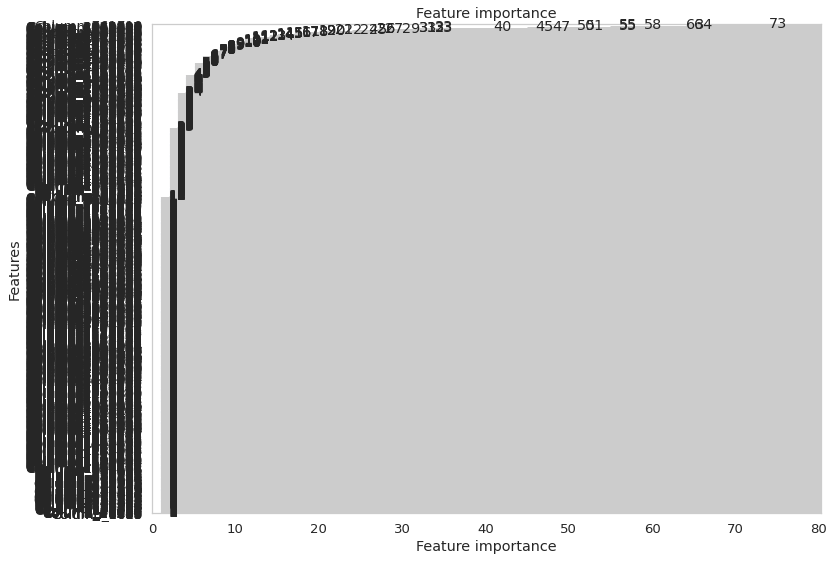

In [96]:
# Feature Importance Plot with LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'whitegrid', font_scale = 1.2)
plot_importance(model);

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
scaler = StandardScaler()

# 3. Word Embedding : fully supervised 

Word2Vec

### Word2Vec with logistic regression

In [97]:
from gensim.models.deprecated.doc2vec import LabeledSentence
from tqdm import tqdm
from gensim.models.fasttext import FastText
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D   
from keras.layers import Convolution1D, MaxPooling1D,BatchNormalization
from keras.layers import Dense, Dropout, Activation, Lambda, Input, merge, Flatten

In [98]:
corpus = []
for sentence in fulldrug.review_clean_nltk:
    corpus.append(sentence)

In [99]:
def labelize(reviews, label_type):
    labelized = []
    for i,v in tqdm(enumerate(reviews)):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized

In [100]:
x_train_w2v, x_test_w2v, y_train_w2v, y_test_w2v = train_test_split(np.array(fulldrug.review_clean_nltk),
                                                    np.array(fulldrug.sentiment_rate.values), test_size=0.2)

In [101]:
x_train_w2v = labelize(x_train_w2v, 'TRAIN')
x_test_w2v = labelize(x_test_w2v, 'TEST')

148437it [00:00, 337543.15it/s]
63616it [00:00, 376478.29it/s]


In [105]:
def fit_w2v(docs, dimension):
    phrases = []
    for phrase in docs:
        for p in phrase:
            phrases.append(p)
    w2v_model = Word2Vec(min_count=1,
                         window=5,
                         size=dimension,
                         sample=6e-5, 
                         alpha=0.03,  
                         negative=20)
    print(f'# of phrases list for word2vec = {len(phrases)}')
    w2v_model.build_vocab([x.words for x in tqdm(x_train_w2v)], progress_per=100000)
    w2v_model.train([x.words for x in tqdm(x_train_w2v)],total_examples=w2v_model.corpus_count, epochs=50, report_delay=1)
    print(f'traind: {w2v_model}')
    return w2v_model

In [106]:
w2v = fit_w2v(corpus, 200)

100%|██████████| 148437/148437 [00:00<00:00, 2018754.37it/s]

# of phrases list for word2vec = 9098569



100%|██████████| 148437/148437 [00:00<00:00, 2035891.60it/s]


traind: Word2Vec(vocab=30668, size=100, alpha=0.03)


In [162]:
clf_w2v = LogisticRegression(C = 0.1).fit(train_vecs_w2v, y_train_w2v)

In [163]:
print(classification_report(clf_w2v.predict(test_vecs_w2v),y_test_w2v))

              precision    recall  f1-score   support

          -1       0.51      0.65      0.57     12364
           0       0.00      0.25      0.01       110
           1       0.93      0.77      0.84     51142

    accuracy                           0.74     63616
   macro avg       0.48      0.55      0.47     63616
weighted avg       0.85      0.74      0.79     63616



In [107]:
print ('building tf-idf matrix ...')

vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=15,ngram_range=(1, 3),max_df = 1.0)
matrix = vectorizer.fit_transform([x.words for x in x_train_w2v])
tfidf2 = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print ('vocab size :', len(tfidf2))

building tf-idf matrix ...
vocab size : 7037


In [ ]:
#tfidf2 = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [108]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += w2v[word].reshape((1, size)) * tfidf2[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

In [109]:
from sklearn.preprocessing import scale
train_vecs_w2v = np.concatenate([buildWordVector(z, 100) for z in tqdm(map(lambda x: x.words, x_train_w2v))])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, 100) for z in tqdm(map(lambda x: x.words, x_test_w2v))])
test_vecs_w2v = scale(test_vecs_w2v)

148437it [00:42, 3526.97it/s]
63616it [00:17, 3545.33it/s]


In [162]:
clf_w2v = LogisticRegression(C = 0.1).fit(train_vecs_w2v, y_train_w2v)

In [190]:
print(classification_report(y_test_w2v,clf_w2v.predict(test_vecs_w2v)))

              precision    recall  f1-score   support

          -1       0.65      0.51      0.57     15807
           0       0.25      0.00      0.01      5659
           1       0.77      0.93      0.84     42150

    accuracy                           0.74     63616
   macro avg       0.55      0.48      0.47     63616
weighted avg       0.69      0.74      0.70     63616



### Word2Vec with keras classifier (context independent)

In [164]:
model = Sequential()

model.add(Dense(250, activation='relu',input_dim=100))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(300,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
                
model.add(Dense(300,activation='relu'))                
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. Model compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_vecs_w2v, y_train_w2v, epochs=128, batch_size=32, verbose=0)

In [165]:
score = model.evaluate(test_vecs_w2v, y_test_w2v, batch_size=100, verbose=0)
print("score: " + str(score[1]))

score: 0.6390058994293213


In [166]:
score = model.evaluate(train_vecs_w2v, y_train_w2v, batch_size=50, verbose=0)
print("score: " + str(score[1]))

score: 0.6479583978652954
